Load Traning Data

In [370]:
import numpy as np
from scipy.io import loadmat
m=loadmat("TrainingSamplesDCT_8_new.mat")

In [371]:
m

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Oct 14 00:15:17 2003',
 '__version__': '1.0',
 '__globals__': [],
 'TrainsampleDCT_FG': array([[ 1.31421569e+00, -3.38342563e-01, -8.63802055e-03, ...,
          4.10067525e-03, -1.70351467e-03, -7.18715755e-04],
        [ 1.29019608e+00,  7.55571684e-02, -1.32556382e-03, ...,
         -5.91367766e-04,  6.99808599e-04, -1.88116338e-03],
        [ 1.37058824e+00, -5.93696510e-02, -2.91769678e-02, ...,
          1.12866025e-02,  4.81607195e-04, -2.02858893e-03],
        ...,
        [ 7.62745098e-01, -8.55425076e-02, -6.24151651e-02, ...,
          2.43027108e-04, -6.79088811e-05, -7.22771715e-04],
        [ 8.62254902e-01, -2.31167821e-01,  1.73543271e-01, ...,
         -6.83837231e-03,  4.96790803e-05,  1.25805753e-03],
        [ 2.66568627e+00,  1.40228604e-01, -2.02514221e-01, ...,
          3.75502023e-03, -1.52054142e-03,  2.08619970e-03]]),
 'TrainsampleDCT_BG': array([[ 2.27892157e+00, -8.82044615e-02, -9.9302

In [372]:
foreground,background=m['TrainsampleDCT_FG'],m['TrainsampleDCT_BG']

Estimate Prior Probabilities

In [373]:
total=foreground.shape[0]+background.shape[0]
prior_cheetah=foreground.shape[0]/total
prior_grass=background.shape[0]/total
print(prior_cheetah)
print(prior_grass)

0.1918649270913277
0.8081350729086723


The prior probabilites are same as Quiz 1

In [374]:
# ML log-likelihood foreground
N_FG=foreground.shape[0]
mean_FG=np.mean(foreground,axis=0)
var_FG=np.var(foreground,axis=0)
cov_FG=np.cov(foreground,rowvar=False)

first_equ = -N_FG/2 *np.log(2*np.pi)
second_equ = -N_FG * np.log(var_FG)
third_equ = -0.5 * np.sum(((foreground-mean_FG)/var_FG)**2,axis=0)
log_liklihood_FG = first_equ+second_equ+third_equ
print(log_liklihood_FG)



[-4.70716636e+02 -2.11385536e+03 -1.90017447e+03 -9.24425633e+03
 -8.49019222e+03 -5.96591581e+03 -8.54445612e+03 -9.06569584e+03
 -1.06086062e+04 -1.76452106e+04 -4.25080019e+04 -2.18337108e+04
 -1.66018763e+04 -1.09705240e+04 -2.04222580e+04 -5.01204558e+04
 -2.91187302e+04 -1.96524923e+04 -2.66471352e+04 -5.35480240e+04
 -9.85429466e+04 -3.89810267e+05 -1.30545589e+05 -7.95998991e+04
 -3.73107291e+04 -3.83806899e+04 -5.03491519e+04 -1.25880772e+05
 -3.22512354e+05 -1.74052063e+05 -9.88386003e+04 -5.76354461e+04
 -8.86274965e+04 -2.23901424e+05 -4.89447066e+05 -1.67618526e+06
 -1.92522019e+06 -6.28834780e+05 -3.08229101e+05 -1.35163465e+05
 -1.48428186e+05 -2.39939988e+05 -5.32444471e+05 -5.81310131e+05
 -3.08393596e+05 -3.39686099e+05 -6.05069246e+05 -9.03360375e+05
 -2.26608299e+06 -3.20148016e+06 -1.43095944e+06 -1.04082932e+06
 -9.46581806e+05 -1.12675619e+06 -1.79154509e+06 -2.08743184e+06
 -2.63312413e+06 -4.89546022e+06 -9.01371786e+06 -5.18892186e+06
 -3.74007174e+06 -7.53626

In [375]:
# ML log-likelihoo background
N_BG=background.shape[0]
mean_BG=np.mean(background,axis=0)
var_BG=np.var(background,axis=0)
cov_BG=np.cov(background,rowvar=False)
first_equ = -N_BG/2 *np.log(2*np.pi)
second_equ = -N_BG * np.log(var_BG)
third_equ = -0.5 * np.sum(((background-mean_BG)/var_BG)**2,axis=0)
log_liklihood_BG = first_equ+second_equ+third_equ
print(log_liklihood_BG)

[-1.41412323e+03 -2.21771343e+04 -1.44020353e+04 -7.51039782e+04
 -6.68154939e+04 -6.38982068e+04 -1.70787067e+05 -1.35718003e+05
 -1.95231974e+05 -2.95431898e+05 -8.84289490e+05 -5.08659089e+05
 -3.08100383e+05 -2.93504692e+05 -4.05231030e+05 -9.49134678e+05
 -6.83926450e+05 -6.53896033e+05 -7.91363194e+05 -1.42294880e+06
 -2.70044407e+06 -8.28847586e+06 -3.45352366e+06 -1.97445721e+06
 -1.31804274e+06 -1.10547763e+06 -1.79835871e+06 -2.51369988e+06
 -5.55893565e+06 -3.96236354e+06 -2.58126521e+06 -2.60538713e+06
 -2.99778529e+06 -4.61835564e+06 -1.06474177e+07 -2.26737098e+07
 -3.14985547e+07 -1.23679945e+07 -7.14265428e+06 -4.69197030e+06
 -4.56139318e+06 -5.31099512e+06 -8.55954791e+06 -1.06313588e+07
 -8.84632265e+06 -8.47609814e+06 -1.14331582e+07 -1.97521625e+07
 -3.36892536e+07 -4.44571857e+07 -2.81184434e+07 -1.99448687e+07
 -1.32315646e+07 -1.59680409e+07 -2.26553864e+07 -2.70007138e+07
 -3.38635412e+07 -5.18680911e+07 -6.22575073e+07 -4.56685908e+07
 -4.25664588e+07 -5.85052

create 64 plots with the marginal densities for the two classes   P(x|cheetah) and P(x|grass) under the Gaussian assumption

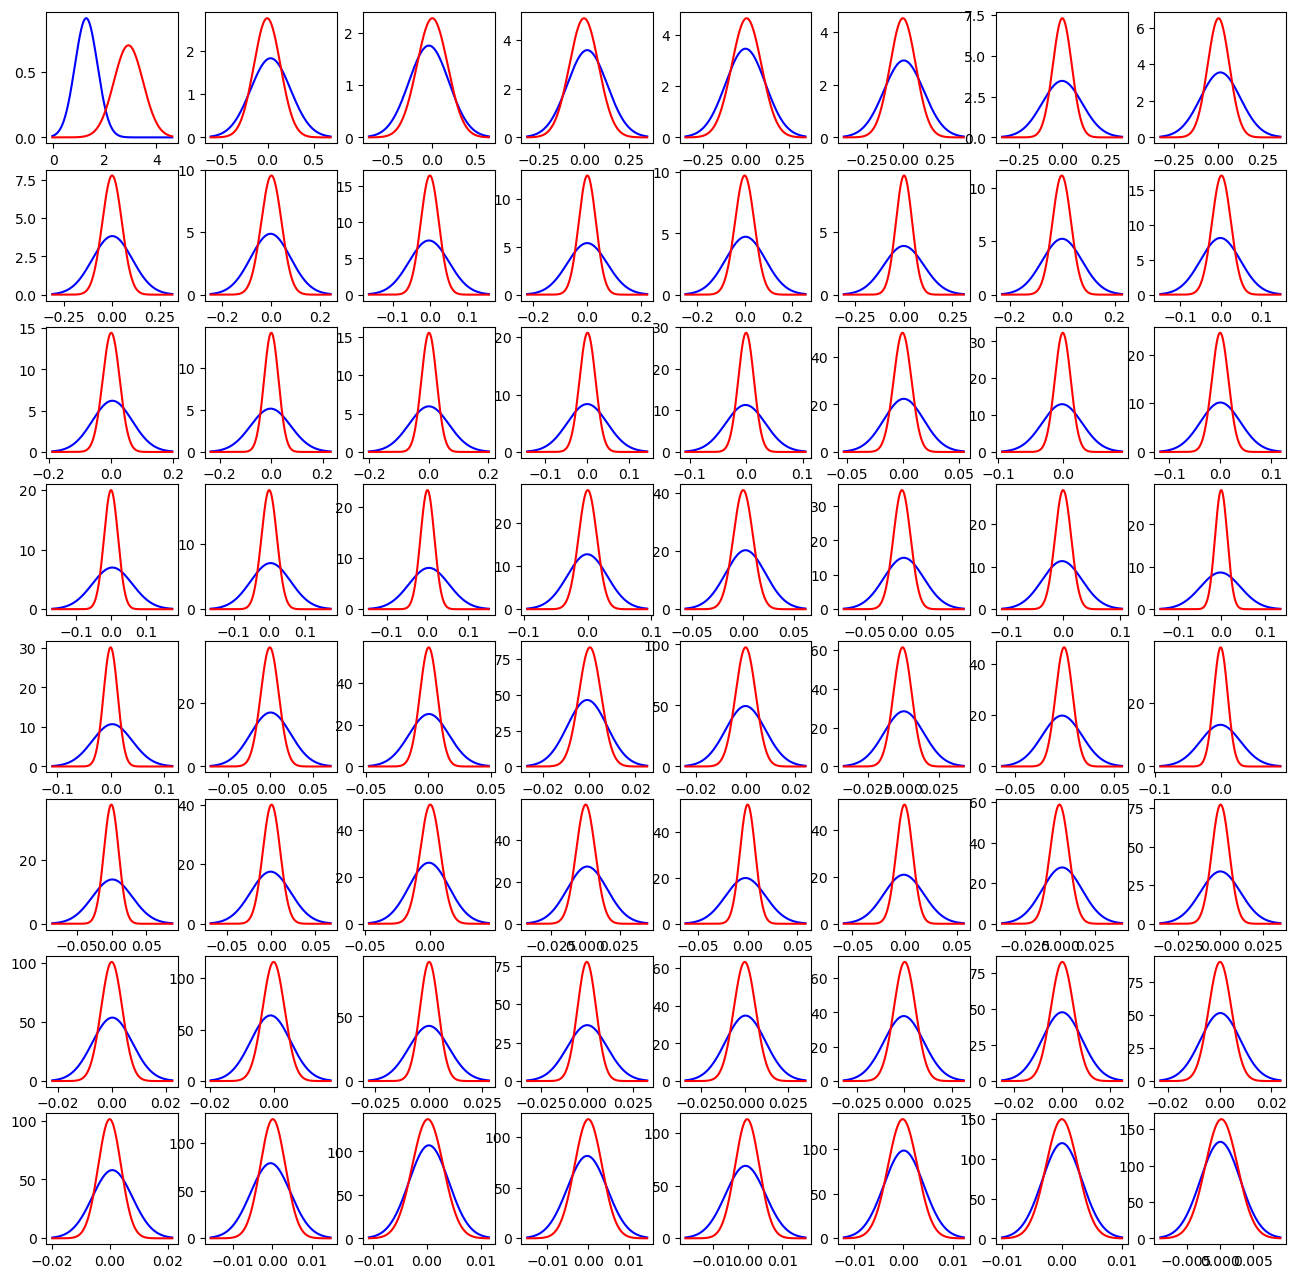

In [376]:
import matplotlib.pyplot as plt
from scipy.stats import norm

fig, axes = plt.subplots(8, 8, figsize=(16, 16))

for i in range(64):
    row, col = divmod(i, 8) 
    ax = axes[row, col]
    x_FG = np.linspace(mean_FG[i] - 3 * np.sqrt(var_FG[i]), mean_FG[i] + 3 * np.sqrt(var_FG[i]), 500)
    x_BG = np.linspace(mean_BG[i] - 3* np.sqrt(var_BG[i]), mean_BG[i] + 3 * np.sqrt(var_BG[i]), 500)
    x = np.sort(np.concatenate((x_FG, x_BG)))
     
    y_FG = norm.pdf(x, mean_FG[i], np.sqrt(var_FG[i]))
    y_BG = norm.pdf(x, mean_BG[i], np.sqrt(var_BG[i]))
    
    
    
    ax.plot(x, y_FG, color="blue")
    ax.plot(x, y_BG, color="red")
    
plt.show()

In [377]:
best_8=[0,17,24,26,31,32,39,40]
worse_8=[2,3,4,5,58,61,62,63]

PLot the best 8 features

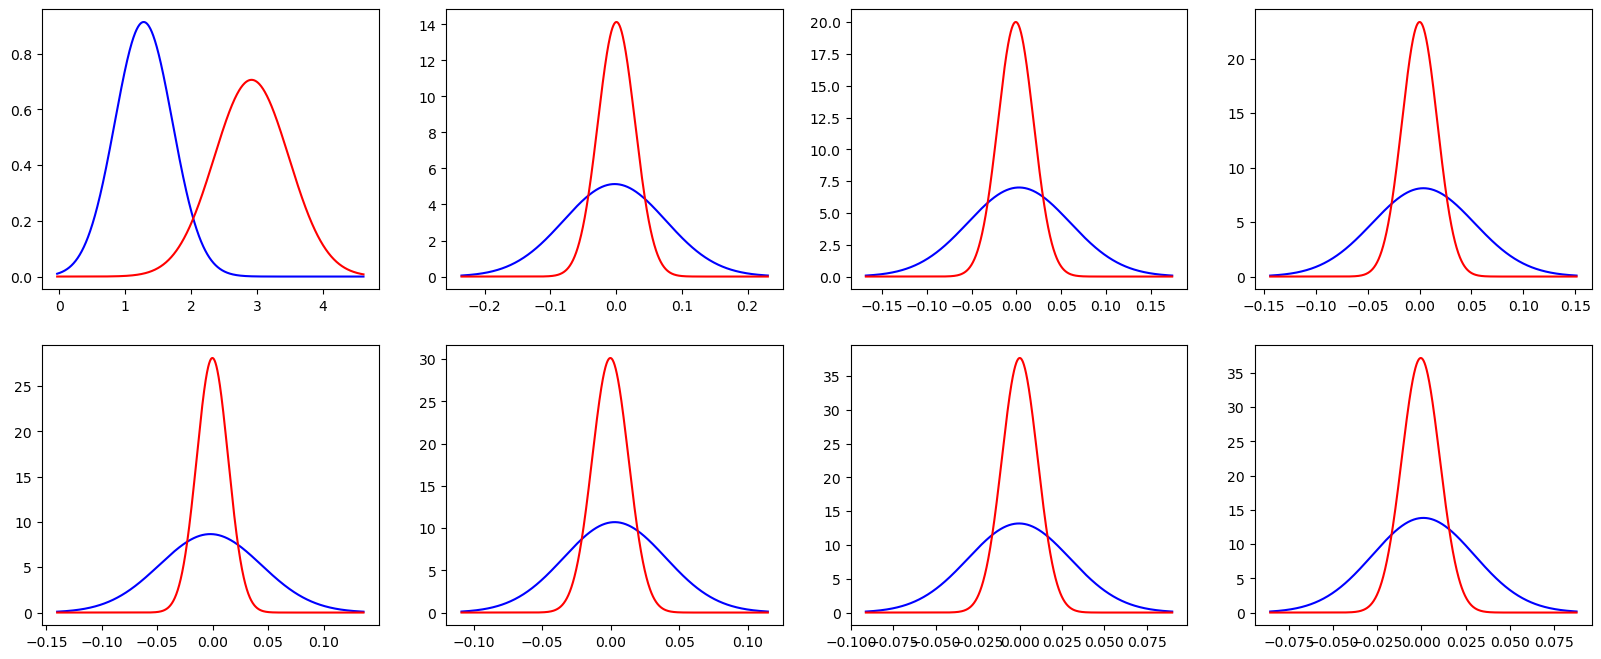

In [378]:

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()
for idex, i in enumerate(best_8):
    ax=axes[idex]
    x8_FG = np.linspace(mean_FG[i] - 3 * np.sqrt(var_FG[i]), mean_FG[i] + 3 * np.sqrt(var_FG[i]), 500)
    x8_BG = np.linspace(mean_BG[i] - 3 * np.sqrt(var_BG[i]), mean_BG[i] + 3 * np.sqrt(var_BG[i]), 500)
    x = np.sort(np.concatenate((x8_FG, x8_BG)))
    
    y8_FG = norm.pdf(x, mean_FG[i], np.sqrt(var_FG[i]))
    y8_BG = norm.pdf(x, mean_BG[i], np.sqrt(var_BG[i]))
    
    ax.plot(x,y8_FG,color="blue")
    ax.plot(x,y8_BG,color="red")
       
plt.show()
    


Plot the worst 8 features

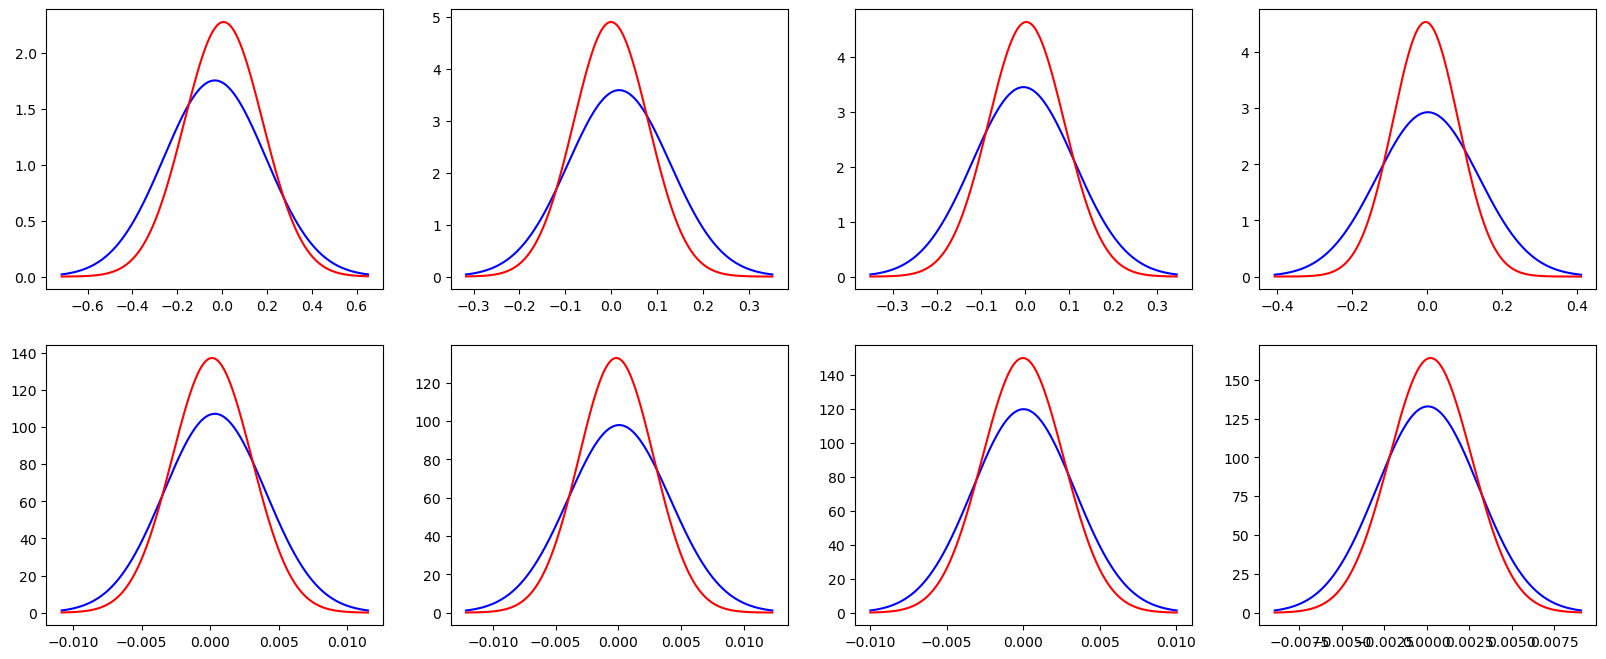

In [379]:

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()
for idex, i in enumerate(worse_8):
    ax=axes[idex]
    x8_FG = np.linspace(mean_FG[i] - 3 * np.sqrt(var_FG[i]), mean_FG[i] + 3 * np.sqrt(var_FG[i]), 500)
    x8_BG = np.linspace(mean_BG[i] - 3 * np.sqrt(var_BG[i]), mean_BG[i] + 3 * np.sqrt(var_BG[i]), 500)
    x = np.sort(np.concatenate((x8_FG, x8_BG)))
    
    y8_FG = norm.pdf(x, mean_FG[i], np.sqrt(var_FG[i]))
    y8_BG = norm.pdf(x, mean_BG[i], np.sqrt(var_BG[i]))
    
    ax.plot(x,y8_FG,color="blue")
    ax.plot(x,y8_BG,color="red")
       
plt.show()

Load Cheetah_image

In [380]:
from PIL import Image
img = np.array(Image.open('/Users/ivanlin328/Desktop/ECE 271A/HW2/cheetah.bmp').convert('L'))
cheetah_image =img.astype(float)/255



Compute the Bayesian Becision Rule using 64-dimensional Gaussians

In [381]:

zig_zag = np.array([[0,1,5,6,14,15,27,28],[2,4,7,13,16,26,29,42],[3,8,12,17,25,30,41,43],
                  [9,11,18,24,31,40,44,53],[10,19,23,32,39,45,52,54],[20,22,33,38,46,51,55,60],
                   [21,34,37,47,50,56,59,61],[35,36,48,49,57,58,62,63]])
z_flat=zig_zag.flatten()
def zig_zag_transform(a):
    result = np.zeros(64)
    for i in range(64):
       result[z_flat[i]] = a[i]
    return result

    

In [382]:
from numpy.linalg import inv,det
from scipy.fft import dctn

row,column=cheetah_image.shape
A=[]

cov_FG_inv = inv(cov_FG)
cov_BG_inv = inv(cov_BG)
cov_FG_det = det(cov_FG)
cov_BG_det = det(cov_BG)


for i in range(0,row-8):
   for j in range(0,column-8):
        block=cheetah_image[i:i+8,j:j+8]
        block_dct=dctn(block,norm='ortho').flatten()
        block_feature=zig_zag_transform(block_dct)  
        
        diff_FG = block_feature - mean_FG
        diff_BG = block_feature - mean_BG 
        
        const_FG = np.log((2*np.pi)**64 * cov_FG_det) - 2 * np.log(prior_cheetah)
        const_BG = np.log((2*np.pi)**64 * cov_BG_det) - 2 * np.log(prior_grass)
        
        log_likelihood_FG = (diff_FG.T).dot(cov_FG_inv).dot(diff_FG) + const_FG
        log_likelihood_BG = (diff_BG.T).dot(cov_BG_inv).dot(diff_BG) + const_BG
        
        if log_likelihood_FG>log_likelihood_BG:
            A.append(0)
        else:
            A.append(1)
A=np.array(A)               
print(A)       

[0 0 0 ... 0 0 0]


In [383]:
A_matrix=np.reshape(A,(247,262))
padd_cheetah64 = np.pad(A_matrix,(4,4),'constant',constant_values = 0)

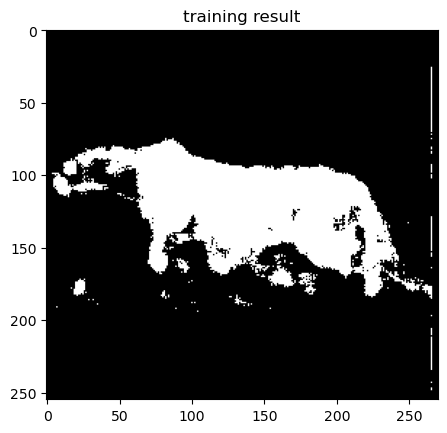

In [384]:
plt.imshow(padd_cheetah64,cmap='gray')
plt.title("training result")
plt.show()

In [385]:
foreground_best8 = foreground[:,best_8]
background_best8 = background[:,best_8]
print(foreground_best8.shape)

(250, 8)


Compute the Bayesian Decision Rule using the 8-dimensional

In [386]:
from numpy.linalg import inv,det
from scipy.fft import dctn

row,column=cheetah_image.shape
A=[]

mean_FG_best8 = np.mean(foreground_best8,axis = 0)
mean_BG_best8 = np.mean(background_best8,axis = 0)
cov_FG_best8 = np.cov(foreground_best8.T)
cov_BG_best8 = np.cov(background_best8.T)
cov_FG_best8_inv = inv(cov_FG_best8)
cov_BG_best8_inv = inv(cov_BG_best8)
cov_FG_det = det(cov_FG_best8)
cov_BG_det = det(cov_BG_best8)


for i in range(0,row-8):
   for j in range(0,column-8):
        block=cheetah_image[i:i+8,j:j+8]
        block_dct=dctn(block,norm='ortho').flatten()
        block_feature=zig_zag_transform(block_dct)[best_8] 
        
        diff8_FG = block_feature - mean_FG_best8
        diff8_BG = block_feature - mean_BG_best8
        
        const8_FG = np.log((2*np.pi)**64 * cov_FG_det) - 2 * np.log(prior_cheetah)
        const8_BG = np.log((2*np.pi)**64 * cov_BG_det) - 2 * np.log(prior_grass)
        
        log_likelihood_FG = (diff8_FG.T).dot(cov_FG_best8_inv).dot(diff8_FG) + const8_FG
        log_likelihood_BG = (diff8_BG.T).dot(cov_BG_best8_inv).dot(diff8_BG) + const8_BG
        
        if log_likelihood_FG>log_likelihood_BG:
            A.append(0)
        else:
            A.append(1)
A=np.array(A)               
print(A) 

[0 0 0 ... 0 0 0]


In [387]:
A_matrix=np.reshape(A,(247,262))
padd_cheetah8 = np.pad(A_matrix,(4,4),'constant',constant_values = 0)

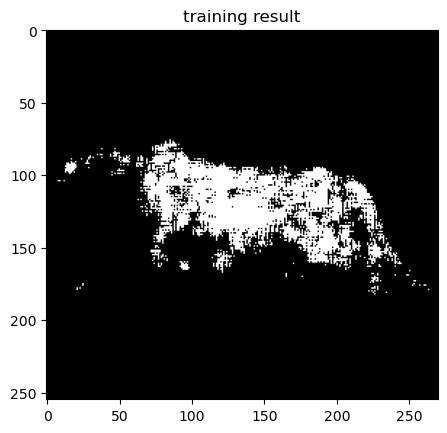

In [388]:
plt.imshow(padd_cheetah8,cmap='gray')
plt.title("training result")
plt.show()

Compute the probability of error

In [389]:
from PIL import Image
img = np.array(Image.open('/Users/ivanlin328/Desktop/ECE 271A/HW2/cheetah_mask.bmp').convert('L'))
cheetah_mask =img.astype(float)/255

In [390]:
e64 = np.absolute( cheetah_mask- padd_cheetah64)
e8 = np.absolute(cheetah_mask - padd_cheetah8)
prob_error_64 = np.sum(e64) / (255 * 270)
prob_error_8 = np.sum(e8) / (255 * 270)

In [391]:
print('probability of error using all 64 features ',prob_error_64)
print('probability of error using all 8 features ',prob_error_8)

probability of error using all 64 features  0.05228758169934641
probability of error using all 8 features  0.09667392883079158


Using 64 dimensions includes the full information of the image, allowing the model to capture finer differences between classes and resulting in higher classification accuracy. However, reducing to 8 dimensions causes information loss, which can lead to overlapping class distributions and increased classification errors.